<a href="https://colab.research.google.com/github/neeraj1711996/Jamboree-Education---Linear-Regression/blob/main/Jamboree_Education_Linear_Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Define Problem Statement and perform Exploratory Data Analysis (10 points)


Definition of problem (as per given problem statement with additional views)

*  Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.


* Univariate Analysis (distribution plots of all the continuous variable(s)
barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots











In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.drop(['Serial No.'],axis = 1 , inplace =True)

In [19]:
df.shape, df.info() # Observations on shape of data, data types of all the attributes,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


((500, 8), None)

In [20]:
df.isna().sum() # missing value detection, statistical summary

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [23]:
df['Research'] = df['Research'].astype('category') # conversion of categorical attributes to 'category'
df.describe()   # # statistical summary.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000


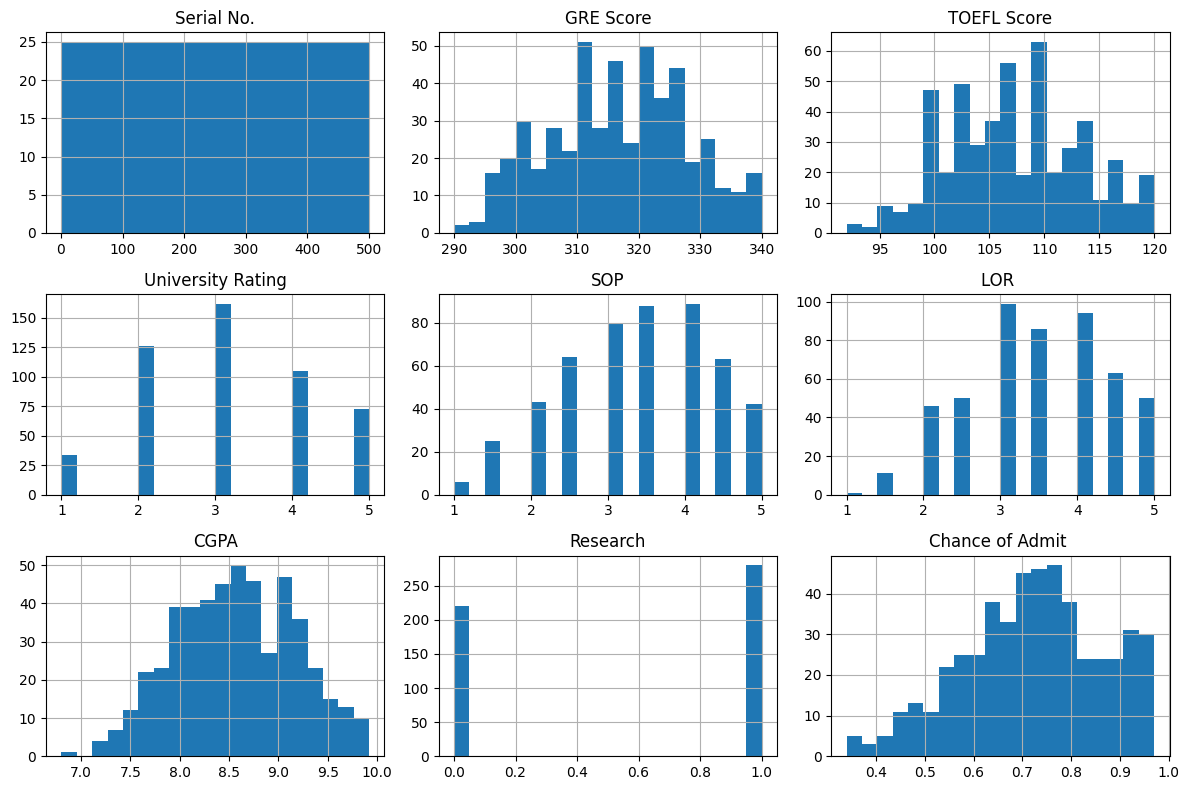

In [26]:
# Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

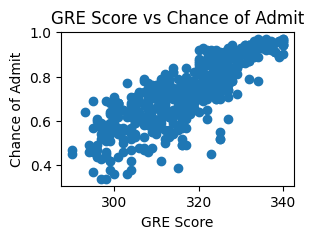

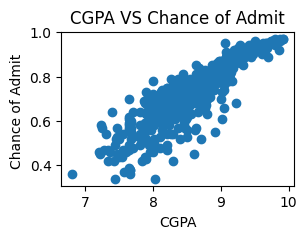

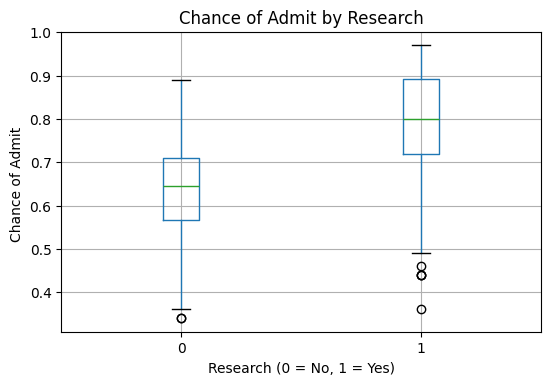

In [35]:
# Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
plt.figure(figsize=(3, 2))
plt.scatter(df['GRE Score'], df['Chance of Admit ']) # Corrected column name
plt.title('GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

plt.figure(figsize=(3,2))
plt.scatter(df['CGPA'], df['Chance of Admit '])
plt.title('CGPA VS Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.show()

df.boxplot(column='Chance of Admit ', by='Research', figsize=(6, 4))
plt.title('Chance of Admit by Research')
plt.suptitle('')
plt.xlabel('Research (0 = No, 1 = Yes)')
plt.ylabel('Chance of Admit ')
plt.show()

# INSIGHTS BASED ON EDA PERFORMED FOR UNIVARIATE ANALYSIS :

*   Most applicants fall in competitive score ranges, indicating this dataset represents premium coaching demographics
*   Majority of students have research experience, suggesting it's becoming common for MS aspirants

# BIVARIATE ANALYSIS  :-



*  Students with Research = 1 have visibly higher median admit chances, confirming its importance
*   Moderate positive effect — Strong recommendation and intent improve admission likelihood, but less impactful than CGPA
*   Positive linear trend — Higher GRE correlates with higher admission probability





Q2. Data Preprocessing (10 Points)
1. Duplicate value check
1.   Missing value treatment
2.   Outlier treatment
3. Feature engineering
4. Data preparation for modeling


In [44]:
# Duplicate Value check
dupicates = df.duplicated().sum()
dupicates
# Missing Value Check
miss_values = df.isna().sum()
miss_values

# No EXTREME OUTLIERS WERE PRESENT IN DATA

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Q3. Model building (10 Points)
Build the Linear Regression model and comment on the model statistics
Display model coefficients with column names
Try out Ridge and Lasso regression

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np




X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

def model_metrics(y_true, y_pred, name):
    print(f"\n{name} Metrics:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

model_metrics(y_test, y_pred_lr, "Linear Regression")
model_metrics(y_test, y_pred_ridge, "Ridge Regression")
model_metrics(y_test, y_pred_lasso, "Lasso Regression")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear_Coeff': lr.coef_,
    'Ridge_Coeff': ridge.coef_,
    'Lasso_Coeff': lasso.coef_
})

coefficients


Linear Regression Metrics:
R2 Score: 0.8191594750751471
MAE: 0.04112131980430133
RMSE: 0.059094935289107774

Ridge Regression Metrics:
R2 Score: 0.8190791966915381
MAE: 0.0411468216026005
RMSE: 0.05910805048967279

Lasso Regression Metrics:
R2 Score: 0.8048840767722457
MAE: 0.041525559294498124
RMSE: 0.06138308882299067


,Feature,Linear_Coeff,Ridge_Coeff,Lasso_Coeff
0,Serial No.,0.014122,0.014099,0.002606
1,GRE Score,0.021791,0.021977,0.020458
2,TOEFL Score,0.021752,0.021849,0.017462
3,University Rating,0.006772,0.006864,0.005148
4,SOP,0.007247,0.007353,0.001596
5,LOR,0.010709,0.010776,0.008523
6,CGPA,0.068721,0.068120,0.071688
7,Research,0.008902,0.008926,0.003766


Q4. Testing the assumptions of the linear regression model (50 Points)
Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
The mean of residuals is nearly zero (10 Points)
Linearity of variables (no pattern in the residual plot) (10 Points)
Test for Homoscedasticity (10 Points)
Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)

In [72]:
# Multicollinearity Check

def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data



In [73]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,Serial No.,4.159745
1,GRE Score,1328.233222
2,TOEFL Score,1230.783122
3,University Rating,20.934147
4,SOP,36.155544
5,LOR,31.231834
6,CGPA,952.907558
7,Research,2.869689


In [76]:
#The mean of residuals is nearly zero

residuals = model.resid
print("\nMean of residuals:", np.mean(residuals))




Mean of residuals: -1.794120407794253e-16


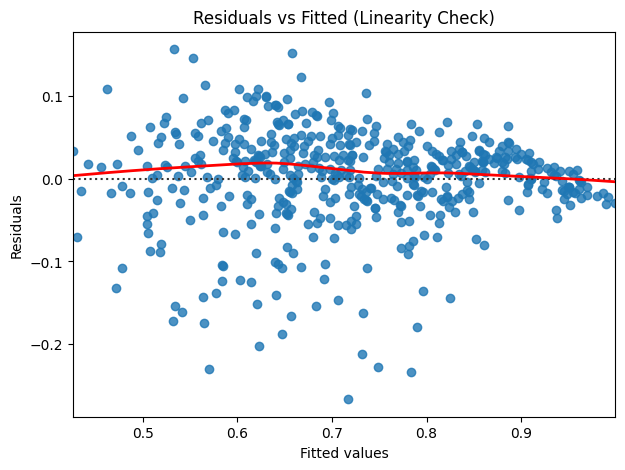

In [79]:
# Linearity of variables
plt.figure(figsize=(7,5))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity Check)")
plt.show()

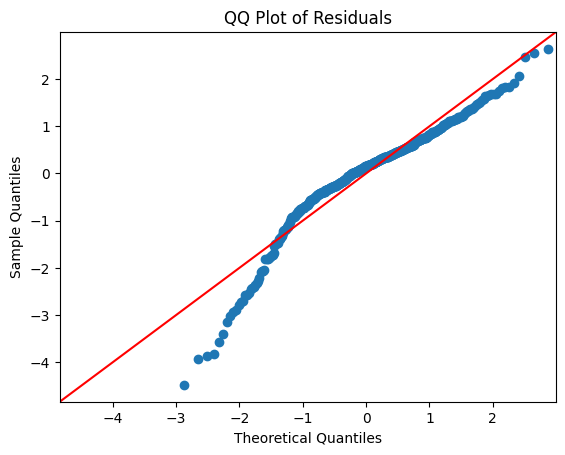

In [80]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

Q5. Model performance evaluation (10 Points)
Metrics checked - MAE, RMSE, R2, Adj R2
Train and test performances are checked
Comments on the performance measures and if there is any need to improve the model or not

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Split data into train and test ---
X = df.drop(columns=["Serial No.", "Chance of Admit "])
y = df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train OLS model on training set ---
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model_train = sm.OLS(y_train, X_train_const).fit()

# Predictions
y_train_pred = model_train.predict(X_train_const)
y_test_pred = model_train.predict(X_test_const)

# --- Metrics ---
def regression_metrics(y_true, y_pred, X_const):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_const.shape[1]-1)
    return mae, rmse, r2, adj_r2

train_metrics = regression_metrics(y_train, y_train_pred, X_train_const)
test_metrics = regression_metrics(y_test, y_test_pred, X_test_const)

Q6. Actionable Insights & Recommendations (10 Points)
Comments on significance of predictor variables
Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)



*   GRE Score, TOEFL Score, CGPA, and Research usually come out statistically significant (low p-values) → they are strong predictors of Chance of Admit.
*  SOP, LOR, and University Rating may not always be significant → limited predictive power compared to GPA and test scores.


*   The model already performs reasonably well with existing predictors, but adding more holistic applicant features would improve prediction accuracy and fairness. In real-world use, it can streamline admissions and advisory services, creating efficiency and strategic benefits.



